<a href="https://colab.research.google.com/github/Gial88/skripsi-gial/blob/main/CodeCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/skripsi/data'

In [3]:
#pip install split-folders tqdm

In [4]:
#import splitfolders

In [5]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib

In [6]:
train_dir = data_dir+'/train'
val_dir = data_dir+'/val'
test_dir = data_dir+'/test'
os.listdir(train_dir)

['normal', 'cataract']

In [7]:
class_name = ['cataract','normal']
class_name

['cataract', 'normal']

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=(0.8,1.2),
                    zoom_range=(0.5,1.0),
                    fill_mode='nearest',
                    )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

Found 746 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


Ukuran gambar : (32, 150, 150, 3)


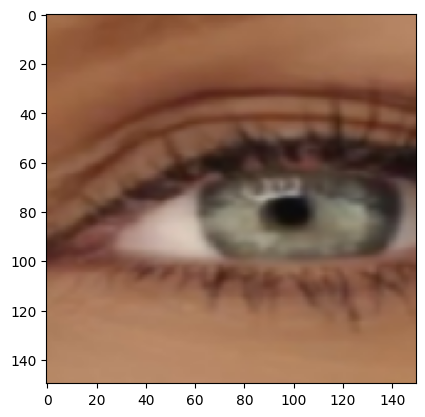

Ukuran gambar : (32, 150, 150, 3)


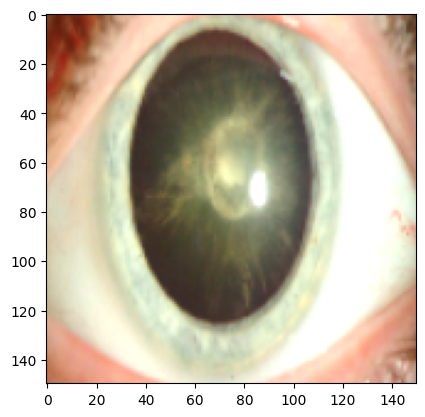

Ukuran gambar : (32, 150, 150, 3)


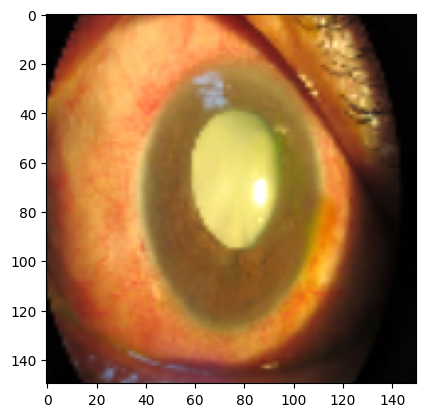

Ukuran gambar : (32, 150, 150, 3)


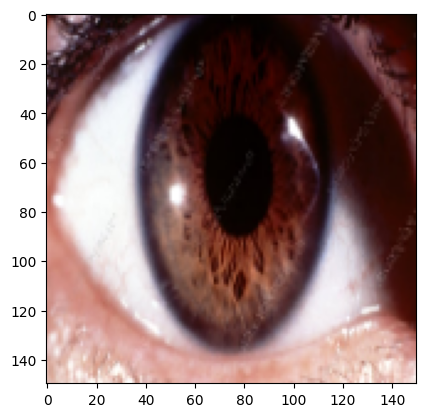

In [10]:
for i in range(4):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)
#(32,150,150,3)
  plt.imshow(img[i])
  plt.show()

In [11]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 256)       0

In [13]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)

In [14]:
hasil = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
24/24 [==============================] - 165s 7s/step - loss: 0.8191 - accuracy: 0.5389 - val_loss: 0.8052 - val_accuracy: 0.5000
Epoch 2/20
24/24 [==============================] - 22s 880ms/step - loss: 0.6454 - accuracy: 0.6394 - val_loss: 0.5337 - val_accuracy: 0.7830
Epoch 3/20
24/24 [==============================] - 22s 897ms/step - loss: 0.5040 - accuracy: 0.7601 - val_loss: 0.4861 - val_accuracy: 0.7547
Epoch 4/20
24/24 [==============================] - 22s 912ms/step - loss: 0.4551 - accuracy: 0.7815 - val_loss: 0.4463 - val_accuracy: 0.7925
Epoch 5/20
24/24 [==============================] - 22s 904ms/step - loss: 0.4238 - accuracy: 0.8003 - val_loss: 0.4846 - val_accuracy: 0.7830
Epoch 6/20
24/24 [==============================] - 22s 905ms/step - loss: 0.3902 - accuracy: 0.8150 - val_loss: 0.5024 - val_accuracy: 0.7358
Epoch 7/20
24/24 [==============================] - 22s 910ms/step - loss: 0.3890 - accuracy: 0.8123 - val_loss: 0.4349 - val_accuracy: 0.8208
E

In [15]:
model.save("Model-3-Last.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
test_evaluate = model.evaluate(test_generator)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

7/7 [==============================] - 65s 11s/step - loss: 0.3195 - accuracy: 0.8411
Test loss     : 0.3195364475250244
Test accuracy : 0.84


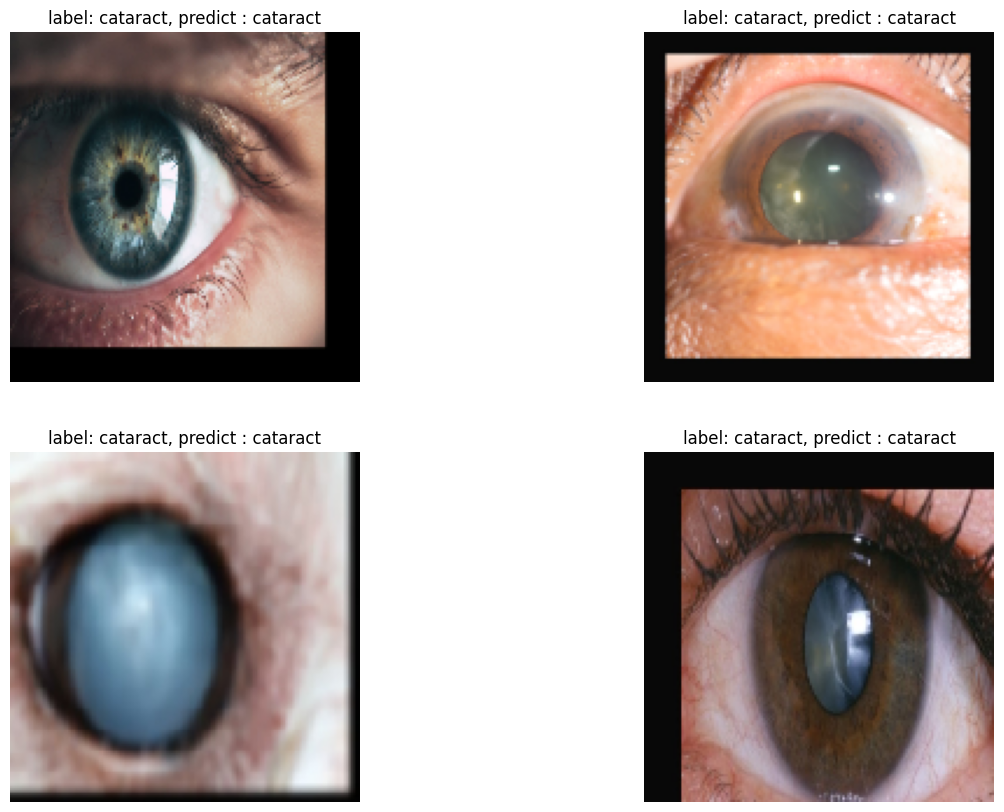

In [17]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(4) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(2,2,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

In [18]:
y_test = test_generator.classes
y_pred = model.predict(test_generator)

7/7 [==============================] - 5s 765ms/step


In [19]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
y_pred = (y_pred > 0.5).astype(int).ravel()

In [21]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

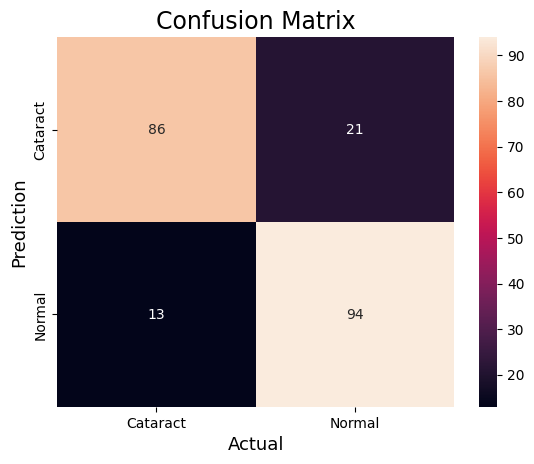

In [22]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cataract','Normal'],
            yticklabels=['Cataract','Normal'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       107
           1       0.82      0.88      0.85       107

    accuracy                           0.84       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.84      0.84      0.84       214

